# Mask Effectiveness (Hypothetical)

We do not necessarily know the effectiveness of different mask types. However, if we can assume some probability of a mask stopping an infection, these graphs demonstrate what that number would mean in terms of an expected number of stoppages. Finally, we briefly explore the theory behind these graphs.

## Hypothetical Probabilities

Each curve in the graph represents a hypothetical mask, with effectiveness _p_ (i.e. if you would have been infected, the mask will stop the infection with probability _p_). The x-axis is the number of times that the hypothetical wearer faces an infection event- that is, the number of encounters that you had that would have resulted in an infection. The y-axis is, with protection effectiveness _p_, that you would make it through all _x_ encounters so far without getting infected. Eventually, this curve will approach 100%, but if this curve is delayed, then you could expect to pass more infection events unscathed.

Each curve highlights the 50% point; what that means is that with effectiveness _p_, when that curve crosses the 50% line, you'd be more likely than not to have been infected.

In [1]:
from typing import List

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

def plot_p_contraction(n: int, probs: List[float], xticks: int):
    """Plot a graph of the likelihood of contracting COVID-19 after n exposures.

    The x axis represents number of exposures to the virus which, if not
    blocked, would result in contracting the virus. Note that this is at
    most the number of total social interactions, and probably much
    smaller than that number.

    The y axis represents the likelihood of contracting the virus after
    x exposures.

    Each probability represents a mechanism that has a chance, p, of
    preventing contracting the virus. Thus the formula for computing
    the likelihood, y, of contraction after x exposures is y = 1 - p^x.
    
    Args:
        n: Maximum number of exposures to display.
        probs: List of probabilities to plot on this graph.
        xticks: Multiples to tick off on the x axis.
    """
    # Define plot settings.
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set(xlabel='No. of COVID-19 Exposures',
           ylabel='Likelihood of Contraction',
           title='Likelihood of Contraction by Number of Exposures, n = {}'.format(n))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.yaxis.set_major_locator(mtick.MultipleLocator(0.25))
    ax.xaxis.set_major_locator(mtick.MultipleLocator(xticks))
    
    # Plot graphs for each probability value.
    x = np.arange(n + 1)
    for p in probs:
        ax.plot(x, 1 - p ** x, label='{}% Effectiveness'.format(int(100 * p)))
    ax.legend()
    
    # Mark the 50% line.
    ax.axhline(y=.5, linestyle='--')
    
    # Ship it!
    plt.show()

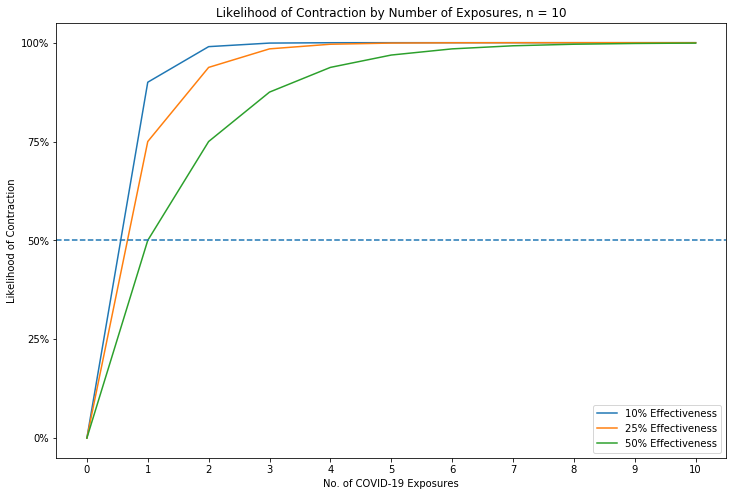

In [2]:
plot_p_contraction(10, [0.1, 0.25, 0.5], 1)

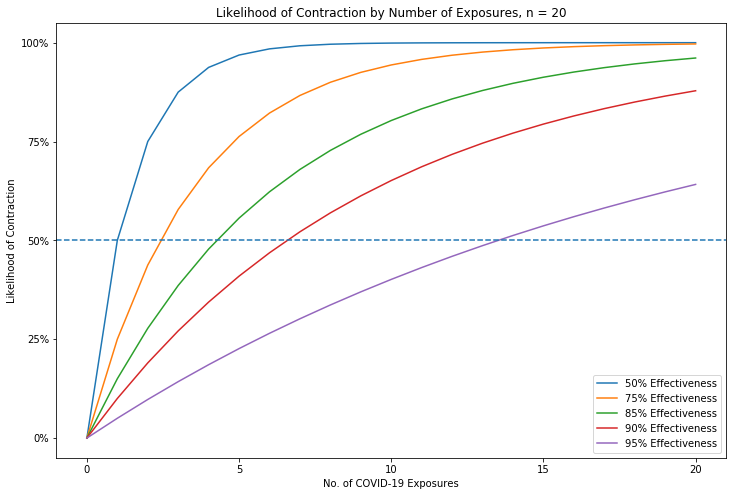

In [3]:
plot_p_contraction(20, [0.5, 0.75, 0.85, 0.9, 0.95], 5)

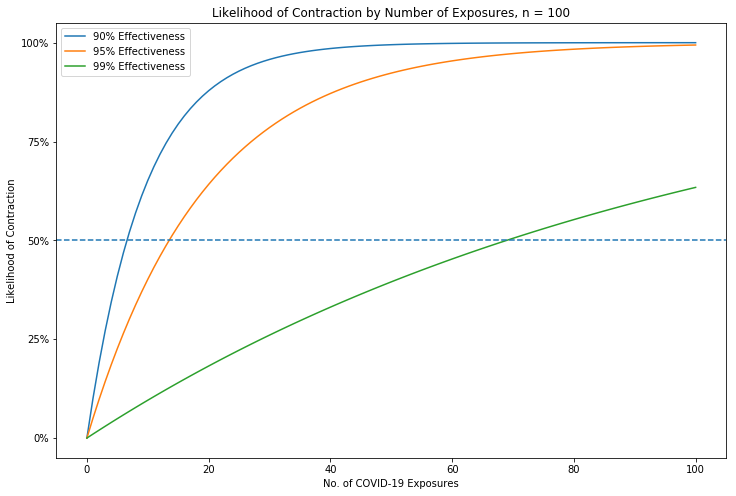

In [4]:
plot_p_contraction(100, [0.9, 0.95, 0.99], 20)

## More Likely than Not

The reason the curves look like this as follows: If you will pass an infection event with probability _p_, then to pass two would be probability $p^2$. Three times, $p^3$. The question then becomes, how long can we expect to go without facing an infection? One way to answer this is to say "it is more likely than not you will be infected when the cumulative probability of getting infected surpasses 50%". We can express this for $0 \le p \le 1$ with the following inequality:

$$p^n \le \frac{1}{2}$$

We realize that $n$ can only increase (you can't unmeet people, no matter how much you might want to), so it would suffice to solve for $n$ and realizing that if we're not infected, if we meet $n$ more COVID-19 positive people, we're more likely than not to have contracted the virus. Writing that solution, we find:

$$n = \frac{\log{\frac{1}{2}}}{log{p}}$$

This curve is easily graphable; it looks like the following (note, x-axis begins at 50%, because y is less than 1 before this point):

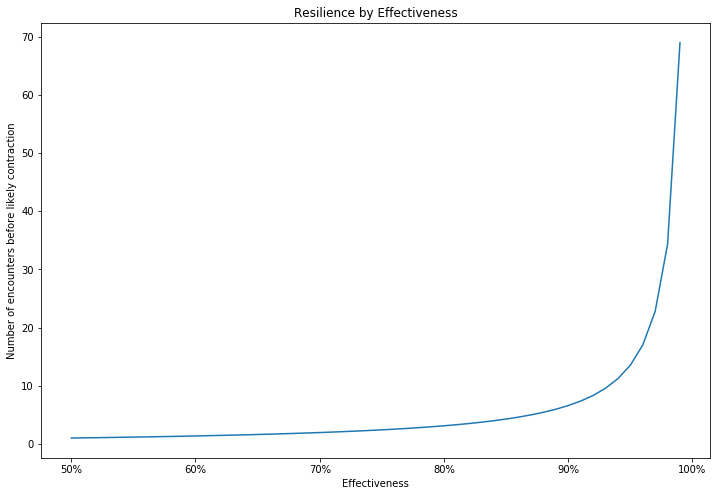

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set(xlabel='Effectiveness',
       ylabel='Number of encounters before likely contraction',
       title='Resilience by Effectiveness')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

step = 0.01
x = np.arange(0.5, 1, step)
ax.plot(x, np.log(0.5) / np.log(x))

plt.show()